In [2]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

2023-10-06 08:59:36.887081: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-06 08:59:37.055488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-06 08:59:37.055522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-06 08:59:37.056319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-06 08:59:37.132163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-06 08:59:37.132929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# dataset_path = "data/training/"

In [3]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [4]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [3]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/baru/db6/data_MfccDwtRmsCqtdb6L4.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_training_80/MVP/New_MVP_062.wav,-39.049145,-35.869541,23.580820,0.999773,-5.308290,-8.596437,5.496264,-11.219730,4.933529,...,0.054707,0.043473,0.051041,0.039181,0.029835,0.022007,0.024270,0.037432,0.038284,MVP
1,../data/DWT_training_80/MVP/New_MVP_109.wav,6.916661,-46.871872,17.376200,10.101994,-1.999699,9.427781,-10.826133,-4.062923,4.149481,...,0.037940,0.044059,0.046937,0.047054,0.044788,0.046270,0.056921,0.067700,0.070000,MVP
2,../data/DWT_training_80/MVP/New_MVP_009.wav,-110.230408,-64.763145,4.438848,-11.156507,18.882509,-18.311113,5.488808,-2.518881,-2.437589,...,0.021333,0.018643,0.012647,0.018997,0.022913,0.020685,0.025265,0.029520,0.030019,MVP
3,../data/DWT_training_80/MVP/New_MVP_069.wav,-89.223915,-54.164196,14.309905,-16.194075,7.749246,-16.942530,11.652919,-3.588035,0.474077,...,0.030201,0.031679,0.027112,0.025045,0.023005,0.013300,0.024939,0.032662,0.040329,MVP
4,../data/DWT_training_80/MVP/New_MVP_028.wav,-137.487488,-64.944023,20.448938,4.072920,9.806987,-22.147934,10.383961,-2.944634,3.984315,...,0.010009,0.011920,0.014695,0.012307,0.012412,0.015085,0.012204,0.012788,0.014611,MVP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 643.9+ KB


In [5]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [6]:
X.shape

(800, 101)

In [7]:
y.head()

0    MVP
1    MVP
2    MVP
3    MVP
4    MVP
Name: label, dtype: object

In [8]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-39.049145,-35.869541,23.580820,0.999773,-5.308290,-8.596437,5.496264,-11.219730,4.933529,-1.570658,...,0.067924,0.054707,0.043473,0.051041,0.039181,0.029835,0.022007,0.024270,0.037432,0.038284
1,6.916661,-46.871872,17.376200,10.101994,-1.999699,9.427781,-10.826133,-4.062923,4.149481,12.064510,...,0.026475,0.037940,0.044059,0.046937,0.047054,0.044788,0.046270,0.056921,0.067700,0.070000
2,-110.230408,-64.763145,4.438848,-11.156507,18.882509,-18.311113,5.488808,-2.518881,-2.437589,-2.201965,...,0.020323,0.021333,0.018643,0.012647,0.018997,0.022913,0.020685,0.025265,0.029520,0.030019
3,-89.223915,-54.164196,14.309905,-16.194075,7.749246,-16.942530,11.652919,-3.588035,0.474077,0.020219,...,0.030332,0.030201,0.031679,0.027112,0.025045,0.023005,0.013300,0.024939,0.032662,0.040329
4,-137.487488,-64.944023,20.448938,4.072920,9.806987,-22.147934,10.383961,-2.944634,3.984315,-3.933743,...,0.014294,0.010009,0.011920,0.014695,0.012307,0.012412,0.015085,0.012204,0.012788,0.014611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,76.093925,-31.681387,11.681855,-1.261876,-5.984991,-3.305500,-3.544377,1.396228,-1.673651,1.622582,...,0.206981,0.186302,0.138882,0.103494,0.094765,0.063363,0.044442,0.082707,0.069805,0.082879
796,73.901810,-41.259899,4.321969,-2.331612,-11.637433,9.336586,6.409134,9.282079,-0.945210,1.935771,...,0.128086,0.071161,0.100737,0.188505,0.211794,0.165209,0.102787,0.133052,0.175451,0.122903
797,-161.168472,-107.334450,32.045254,-5.080995,-7.976376,8.906950,-1.392659,0.981991,-7.986900,-3.038782,...,0.006261,0.005336,0.004146,0.004318,0.006502,0.008674,0.006132,0.006493,0.009919,0.011528
798,-37.587658,-73.903969,23.062490,-7.846325,-7.270073,-0.309886,-4.857831,-7.012275,-8.775138,-0.273512,...,0.020731,0.032998,0.031939,0.032748,0.024624,0.022831,0.026524,0.036656,0.037246,0.031144


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_test.shape

(160,)

In [11]:
X_train.shape

(640, 101)

In [12]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
264,-193.508072,-106.674706,18.534285,-5.765201,6.690382,-9.028718,-2.949955,-1.309007,1.102400,-7.422536,...,0.004823,0.004057,0.004942,0.004794,0.004101,0.003786,0.003483,0.004092,0.004546,0.004499
615,-143.559128,-101.666061,41.067230,-5.949528,6.141171,2.889163,3.204444,1.112999,-1.102587,5.031951,...,0.009570,0.011754,0.012931,0.012918,0.007332,0.011995,0.016284,0.013737,0.014169,0.015857
329,-125.697838,-32.029888,3.173816,-7.838936,-8.084493,-42.646740,30.230616,-9.459812,-1.741535,-11.536338,...,0.026103,0.023596,0.020991,0.019839,0.018420,0.016461,0.014208,0.012367,0.010399,0.007792
342,-121.378197,-54.771961,-2.733801,0.590639,1.598765,-10.072678,18.596033,-16.843401,11.063601,-4.148859,...,0.018044,0.018695,0.018426,0.018255,0.019166,0.020437,0.020895,0.020435,0.018679,0.016207
394,-176.865463,-68.124146,-0.275648,-19.918015,13.175538,-27.690603,2.696204,-5.454249,14.141070,-10.429923,...,0.011203,0.011389,0.011579,0.011362,0.010890,0.009979,0.009430,0.009511,0.010073,0.011317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.655663,-45.610077,29.897348,-9.457516,0.593300,-6.121729,3.637381,6.045263,-5.844248,2.569993,...,0.035886,0.029996,0.017933,0.021612,0.007734,0.024837,0.021485,0.034456,0.035986,0.034577
106,-113.450050,-69.251213,20.889019,-13.503198,5.606741,-8.443784,9.871985,-4.899747,3.933404,-4.926920,...,0.018941,0.012825,0.025580,0.046725,0.046483,0.028419,0.023455,0.023526,0.022771,0.011558
270,-91.031715,-68.258636,17.721188,-11.001854,-8.352360,-1.667182,1.798144,6.355786,-4.948642,-1.003896,...,0.034545,0.035603,0.036468,0.039119,0.041976,0.045251,0.047405,0.047190,0.042870,0.035228
435,-107.203209,-47.929291,-7.535803,-1.728336,0.523919,-34.837063,22.309946,-13.034711,-0.431111,-3.061473,...,0.038690,0.038852,0.038571,0.037542,0.035589,0.032829,0.029062,0.025605,0.021794,0.018271


In [13]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(160,)
(640, 101, 1)
(160, 101, 1)


In [14]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [17]:
# X_train.shape
# X_test.shape

In [15]:
def build_model():
    model = models.Sequential(
        [
            # layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            # layers.MaxPooling1D((3), strides=(2), padding="same"),

            # layers.Conv1D(32, (3) , activation="relu"),
            # layers.MaxPooling1D((3), strides=(2), padding="same"),

            # layers.Flatten(),
            # layers.Dense(64, activation="relu"),
            # layers.Dense(5, activation="softmax"),

            layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Conv1D(32, (3) , activation="relu"),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Flatten(),
            layers.Dense(64, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [16]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                4

In [17]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
40/40 [==============================] - 1s 9ms/step - loss: 1.5879 - acc: 0.4141 - val_loss: 1.3058 - val_acc: 0.5562
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 1.1571 - acc: 0.6625 - val_loss: 1.0704 - val_acc: 0.6750
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9711 - acc: 0.7266 - val_loss: 0.9111 - val_acc: 0.7563
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.8410 - acc: 0.7734 - val_loss: 0.8033 - val_acc: 0.7688
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.7430 - acc: 0.8016 - val_loss: 0.7234 - val_acc: 0.8000
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.6693 - acc: 0.8188 - val_loss: 0.6525 - val_acc: 0.8313
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.6125 - acc: 0.8359 - val_loss: 0.6028 - val_acc: 0.8188
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 0.5621 - acc: 0.84

5/5 [==============================] - 0s 2ms/step - loss: 0.2760 - acc: 0.9250
Accuracy on test set is: 0.925000011920929


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


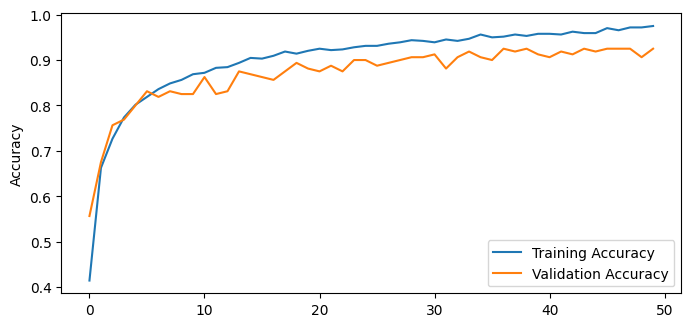

In [18]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

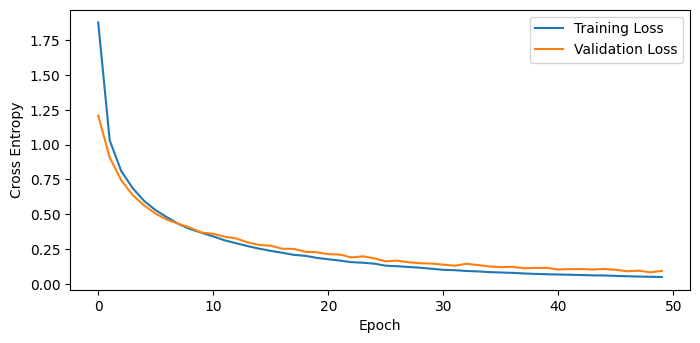

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

5/5 [==============================] - 0s 2ms/step


array([[34,  0,  3,  0,  0],
       [ 0, 33,  1,  0,  0],
       [ 0,  0, 29,  0,  0],
       [ 0,  0,  1, 31,  0],
       [ 0,  0,  0,  0, 28]])

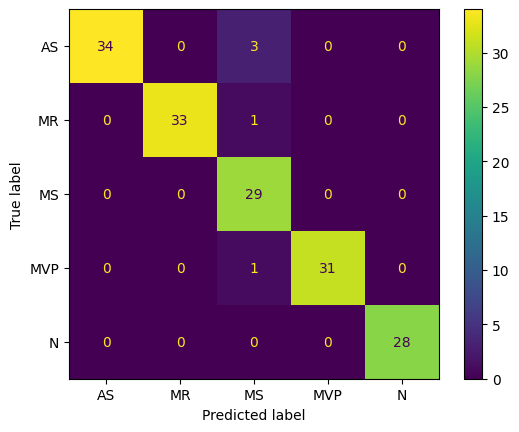

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [25]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [26]:
print(TNR)

[1.         1.         0.96183206 1.         1.        ]


In [27]:
# specificity AS
# TN / (TN + FP)
# spe = 


In [28]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       1.00      0.97      0.99        34
           2       0.85      1.00      0.92        29
           3       1.00      0.97      0.98        32
           4       1.00      1.00      1.00        28

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



### Testing

In [20]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                4

In [27]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db6', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD4, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD4)[0]
    cqt = np.abs(librosa.cqt(y=cD4, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [44]:
predict('../data/testing_20/AS/New_AS_174.wav')

1/1 [==============================] - 0s 86ms/step
[9.9675661e-01 1.6532479e-03 1.4197468e-03 1.4188995e-04 2.8498132e-05]
0
Predicted class: AS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1510
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=378
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=189
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=95
  warnings.warn(
